## Import Modules

In [133]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


## Import the Fashion MNIST dataset

In [135]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Create Class Names

In [136]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the Data

In [137]:
train_images.shape

(60000, 28, 28)

In [140]:
len(train_labels)

60000

In [141]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [142]:
test_images.shape

(10000, 28, 28)

In [68]:
len(test_labels)

10000

## Preprocess the Data

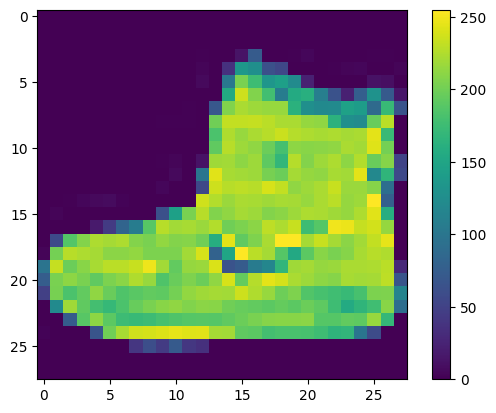

In [143]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [145]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [146]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [148]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [149]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [150]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [151]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


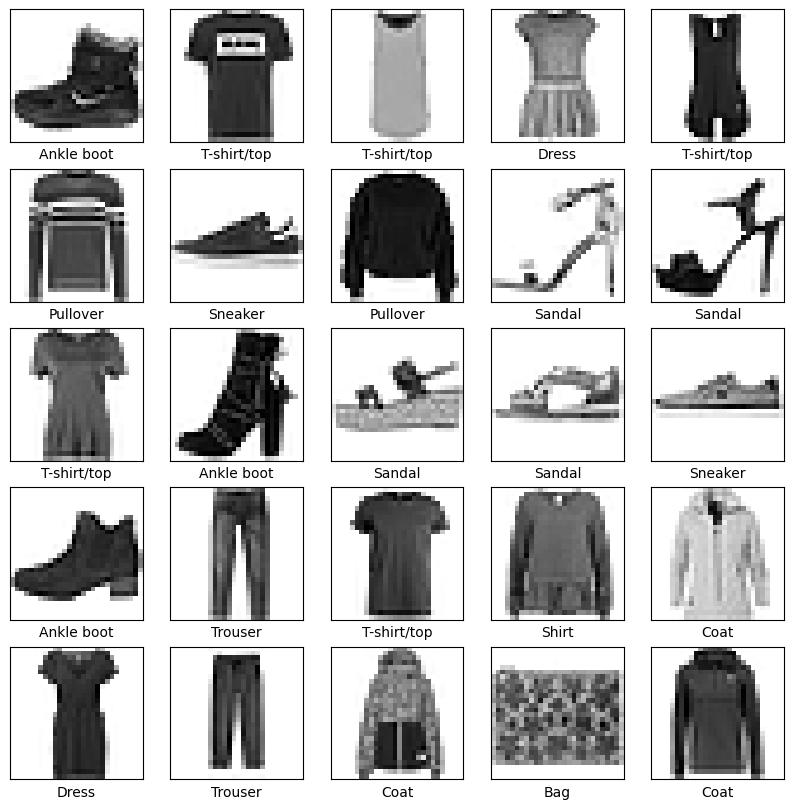

In [152]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()           

## Build the Model

### Set Up the Layers

In [153]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10)
# ])
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

g:\Clothes_Image_Classification\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the Model

In [154]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the Model

### Feed the Model

In [155]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7839 - loss: 0.6202
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8624 - loss: 0.3795
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8740 - loss: 0.3420
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8874 - loss: 0.3102
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8895 - loss: 0.2974
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8978 - loss: 0.2787
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8984 - loss: 0.2711
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9047 - loss: 0.2578
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9095 - loss: 0.2478
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9101 - loss: 0.2398


### Evaluate Accuracy

In [157]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy: ', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8749 - loss: 0.3502

Test accuracy:  0.8748999834060669


### Make Predictions

In [158]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [159]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [160]:
predictions[0]

array([1.8033637e-07, 1.4734741e-08, 3.1257411e-08, 1.1004614e-09,
       4.9965143e-07, 8.5227215e-04, 2.6562972e-07, 4.3623857e-02,
       8.6845910e-07, 9.5552200e-01], dtype=float32)

In [161]:
np.argmax(predictions[0])

9

In [162]:
test_labels[0]

9

In [163]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify Predictions

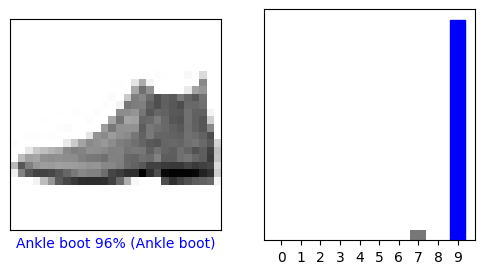

In [164]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

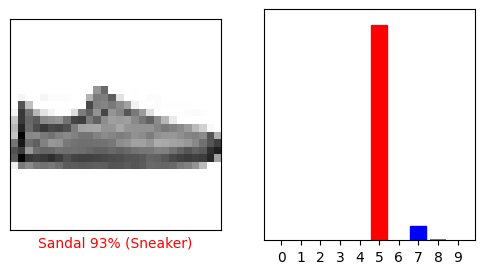

In [165]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

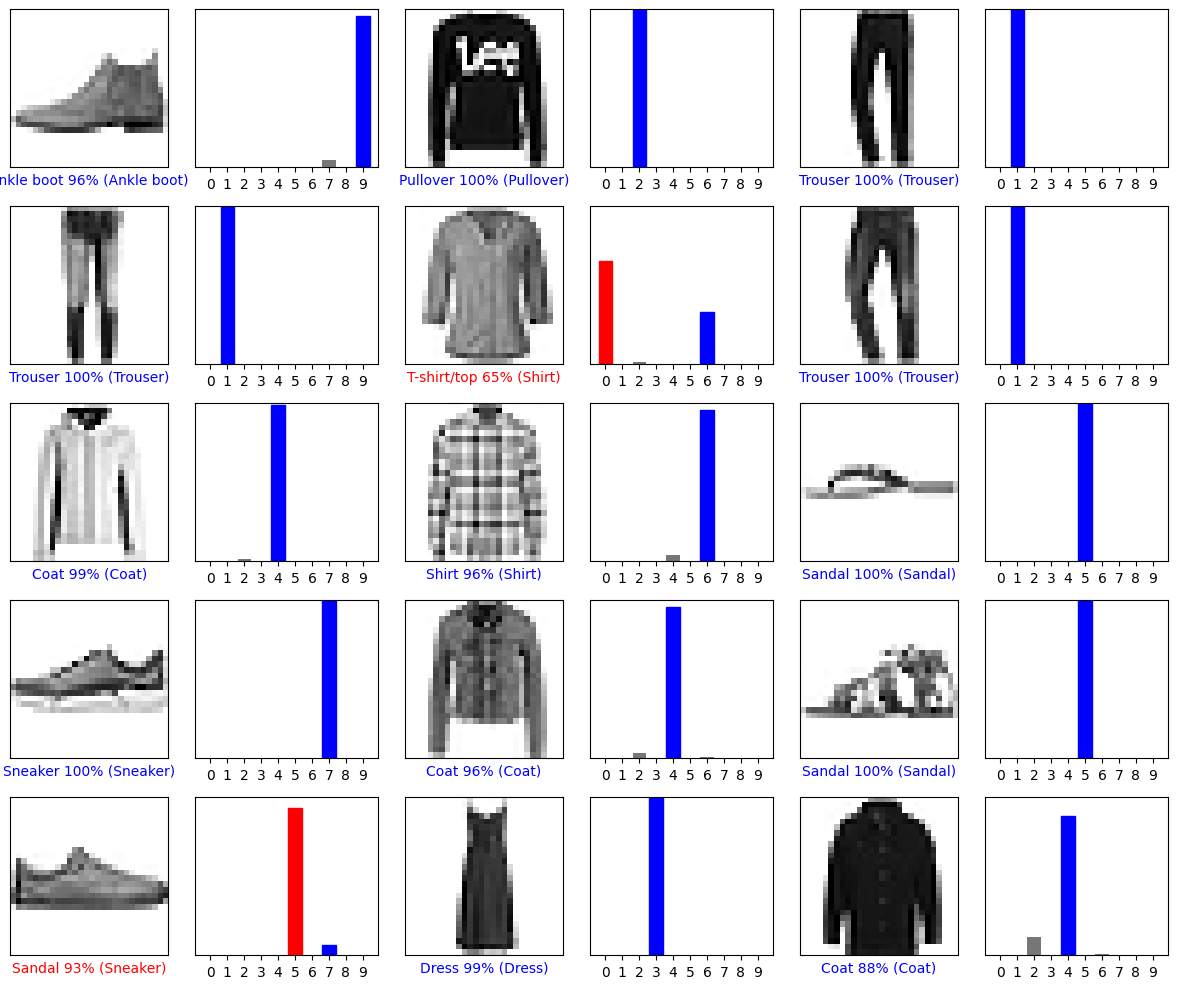

In [166]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the Trained Model

In [167]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28, 1)


In [168]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [169]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[5.0212999e-05 6.1423834e-14 9.9760544e-01 2.9076756e-12 2.2158765e-03
  2.3802397e-15 1.2842225e-04 5.8816409e-18 6.0360128e-10 2.1733248e-16]]


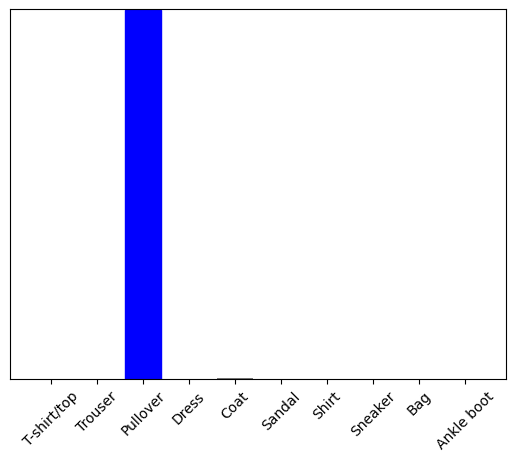

In [170]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [171]:
np.argmax(predictions_single[0])

2

## Save Model

In [172]:
model = probability_model
model.save('models/custom_model.keras')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 10)             │       101,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Reload and Compile Model

In [173]:
restored_model = tf.keras.models.load_model('models/custom_model.keras')
restored_model.summary()
restored_model.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 10)             │       101,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Evaluate Your Image

### Import Your Image

In [228]:
from tensorflow.keras.preprocessing import image

img_path = 'validation_images/Download.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
print(img)

<PIL.Image.Image image mode=L size=28x28 at 0x26F34886650>


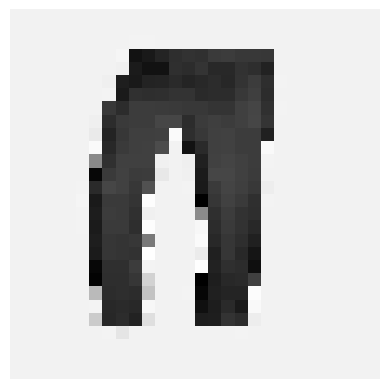

In [229]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

### Convert to Numpy Array & Normalize

In [231]:
img_array = image.img_to_array(img)
print(img_array.shape)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)

(28, 28, 1)
(1, 28, 28, 1)


In [232]:
img_array = img_array.astype('float32')
img_array = img_array / 255
print(img_array)

[[[[0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]]

  [[0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]]

  [[0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [0.7921569 ]
   [

### Prediction

In [233]:
print("Shape of input:", img_array.shape) 
print("Shape of restored model:", restored_model.input_shape)

predictions = restored_model.predict(img_array)

predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {class_names[predicted_class[20]]}")

Shape of input: (1, 28, 28, 1)
Shape of restored model: (None, 28, 28, 1)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class: Pullover


## Draw Your Result

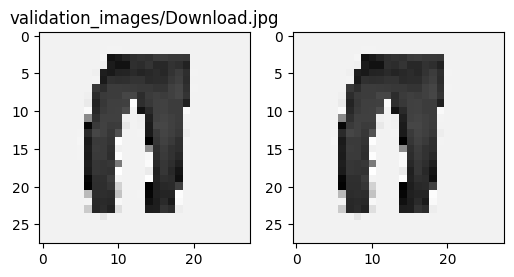

In [234]:
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1) 
plt.imshow(img_array.squeeze(), cmap='gray')
plt.title(img_path) 
plt.subplot(1, 2, 2) 
plt.imshow(img_array.squeeze(), cmap='gray')
plt.show()